In [1]:
# Uncomment following lines if you are running on Google Colab
# Drive and folder directory may need to be changed
# from google.colab import drive
# drive.mount('/content/drive')
# %ls /content/drive/MyDrive
# %cd /content/drive/MyDrive/10-701-Project
# %pip install tensorboardX
from train import *
import helpers
import copy, glob
from plots import *

#Plotting
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
FIGDIR = 'fig/'

/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Running a specific experiment configuration 

In [ ]:
params = {
    'lr': 0.05,
    'dp': True,
    'clipping': 'Linear',
    'num_microbatches': 32,
    'batch_size': 32,
    'S': 1,
    'z': 1.1,
    'gamma': 0.5,
    'lr_c': 0.2,
    'momentum': 0.5,
    'decay': 0,
    'n_epochs' : 20,
}

run_exp('run_a', params, use_devset=True)

## Fetch experiment results over all runs and plot

### Experiment 1 

In [ ]:
exp, params = helpers.load_exp('central_baseline_fixed')
exp['epoch'] = exp['epoch'] + 1
plot_centralized_fixed_cuttoff_experiment(exp)

### Experiment 2

In [ ]:
exp, params= helpers.load_exp('central_baseline_adaptive_cuttoff')
plot_centralized_adaptive_cuttoff_experiment(exp)

In [10]:
exp_epoch, params= helpers.load_exp('Class_CL_adaptive_cuttoff', extension='epoch')
exp_task, params= helpers.load_exp('Class_CL_adaptive_cuttoff', extension='task')
# plot_centralized_adaptive_cuttoff_experiment(exp)

In [11]:
exp_task

,FWT,BWT,benchmark,C
0,0.0,0.000000,MNIST,Exponential
1,0.0,0.000000,MNIST,Exponential
2,0.0,-0.333333,MNIST,Exponential
3,0.0,-0.500000,MNIST,Exponential
4,0.0,-0.600000,MNIST,Exponential
5,0.0,-0.666667,MNIST,Exponential
6,0.0,-0.714286,MNIST,Exponential
7,0.0,-0.750000,MNIST,Exponential
8,0.0,-0.777778,MNIST,Exponential
9,0.0,-0.800000,MNIST,Exponential


<AxesSubplot:xlabel='epoch', ylabel='test_loss'>

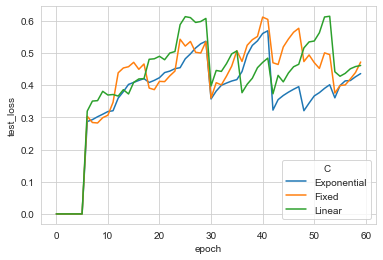

In [9]:
mnist = exp[exp['benchmark'] == 'CIFAR'].reset_index()
sns.lineplot(data=mnist, x='epoch', hue='C', y='test_loss')

In [ ]:
mnist = exp[exp['benchmark'] == 'MNIST'].reset_index()
sns.lineplot(data=mnist, x='epoch', hue='C', y='test_acc')
